# WeRateDogs Wrangle Project

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import tweepy
import requests
import json
import re

In [2]:
pd.set_option('display.max_colwidth', None)

# Gather

In [3]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [4]:
# downloading data programmatically from Udacity servers
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
# making sure response is coming back alright by checking the status code
response.status_code

200

From HTTP status code, basically `200s` are a success, `300s` are redirects and the `400s` are client error

In [5]:
# writing the response content to a file
with open('image-predictions.tsv', 'w') as file:
    file.write(response.text)

In [6]:
# loading up the file with with pandas
df2 = pd.read_csv('image-predictions.tsv', sep='\t')
df2.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [ ]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [ ]:
tweet_ids = df1.tweet_id.values

In [ ]:
from timeit import default_timer as timer

In [ ]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweets_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [7]:
df_list = []
with open('tweets_json.txt','r') as file:
    for line in file:
        data = json.loads(line)
        df_list.append({'tweet_id': data['id'],
                       'retweet_count':data['retweet_count'],
                       'favourite_count': data['favorite_count']})
        
df3 = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favourite_count'])

In [8]:
df3

,tweet_id,retweet_count,favourite_count
0,892420643555336193,6969,33695
1,892177421306343426,5272,29218
2,891815181378084864,3464,21973
3,891689557279858688,7191,36781
4,891327558926688256,7715,35180
...,...,...,...
2161,666049248165822465,36,88
2162,666044226329800704,115,246
2163,666033412701032449,36,100
2164,666029285002620928,39,112


# Assess

In [10]:
df1.sample(210)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
877,760893934457552897,NaN,NaN,2016-08-03 17:43:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wishes. He has the day off. Daily struggles of being a doggo have finally caught up with him. 11/10 https://t.co/H9YgrUkYwa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760893934457552897/photo/1,11,10,Wishes,doggo,None,None,None
416,822610361945911296,NaN,NaN,2017-01-21 01:02:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending in non-canines like this Very Pettable Dozing Bath Tortoise. We only rate dogs. Only send dogs... 12/10 https://t.co/mcagPeENIh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822610361945911296/photo/1,12,10,None,None,None,None,None
194,855245323840757760,NaN,NaN,2017-04-21 02:22:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet George. He looks slightly deflated but overall quite powerful. Not sure how that human restrained him. 12/10 would snug…,8.421635e+17,4.196984e+09,2017-03-16 00:00:07 +0000,"https://twitter.com/dog_rates/status/842163532590374912/photo/1,https://twitter.com/dog_rates/status/842163532590374912/photo/1",12,10,George,None,None,None,None
951,751950017322246144,NaN,NaN,2016-07-10 01:23:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Lola. She's a surfing pupper. 13/10 magical af https://t.co/BlGQkhM5EV,NaN,NaN,NaN,https://vine.co/v/5WrjaYAMvMO,13,10,Lola,None,None,pupper,None
295,837471256429613056,NaN,NaN,2017-03-03 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Vincent. He's suave as h*ck. Will be your copilot this evening. Claims he doesn't need to look at the directions. 12/10 https://t.co/u51tzXSVi3,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/837471256429613056/photo/1,https://twitter.com/dog_rates/status/837471256429613056/photo/1",12,10,Vincent,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,682003177596559360,NaN,NaN,2015-12-30 01:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unique dog here. Wrinkly as hell. Weird segmented neck. Finger on fire. Doesn't seem to notice. 5/10 might still pet https://t.co/Hy9La4xNX3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682003177596559360/photo/1,5,10,None,None,None,None,None
1044,743609206067040256,NaN,NaN,2016-06-17 01:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Stark. He just had his first ice cream cone. Got some on his nose. Requests your assistance. 10/10 would assist https://t.co/YwfN1lbpKA,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/743609206067040256/photo/1,https://twitter.com/dog_rates/status/743609206067040256/photo/1,https://twitter.com/dog_rates/status/743609206067040256/photo/1",10,10,Stark,None,None,None,None
876,761004547850530816,NaN,NaN,2016-08-04 01:03:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both https://t.co/1acHQS8rvK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761004547850530816/photo/1,11,10,Bo,None,None,None,None
394,825829644528148480,NaN,NaN,2017-01-29 22:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Toby. He just found out you only pretend to throw the ball sometimes. H*ckin puppalled. 12/10 would console https://t.co/YimNdkZrhM,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/825829644528148480/photo/1,https://twitter.com/dog_ra

From visual assessment of the dataframe above, in the `name` column there are names that are missing and represented by 'None' in strings, this is a quality issue because pandas sees this as a value strings not `NaN`. 

Also, there are some invalid value names present in the `name` column, example; such,Al,all,an,the etcetera. This is probably caused by absense of dog name in the tweet text. This claim can be confirmed logically by using a programmatic assessment to pull out the lower first letters case, that is names that starts with a lower case from the name column since all valid names starts with an uppercase.

In [11]:
#for further programmatic assessment of 'None' represented by value string
df1.name.isnull().values.any()

False

In [12]:
# name column values that starts with a lower case
df1[df1['name'].str[0].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None


This confirms the quality issues of invalid dog name as a result of absence of the dog name in the tweets.

In [13]:
# checking for dog names that contains all uppercase strings
df1[df1['name'].str[:].str.isupper()][['text','name']]

,text,name
775,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,O
2041,"This is JD (stands for ""just dog""). He's like Airbud but with trading card games instead of sports. 10/10 much skill https://t.co/zzueJV9jCF",JD


From the assesment above, there is an issue with invalid dog name 'O', which should have been O'Malley. This might have been the result of not taking into account hiphen ' while extracting the dog name. For the second row the name JD is not a dog name because just as in the text indicates, it stands for 'Just dog'. This is also a rare quality issue.

The `source` column also has a quality issue of html tags in all of the tweets source values.

There is also the tidiness issue of dog stages; doggo, floofer, pupper and puppo spread across in columns.

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The quality issues spotted from the summary statistics of the dataframes are;
- tweet_id datatypes should be a `string` instead of `int` since they are the unique identifier of our dataframes and no aggregate function will be performed on them
- The `retweeted_status_id`,`retweeted_status_user_id` and `retweeted_status_timestamp` columns are considered duplicated rows since they are retweets and we are only interested in original tweets. This is considered quality issue
- `timestamp` datatypes should be in datetime not strings


In [15]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


The above descriptive statistics shows the absurd large value numbers in the `rating_numerator` and `rating_denominator` column. For further assessing them visually, dataframes of rating numerator larger than 15 (15 because it is not that far from the 75% percentile of the numerator) and rating denominator not equal to 10

In [16]:
df1[(df1['rating_numerator'] > 15) | (df1['rating_denominator'] != 10)][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10


From visualling assesment above, some of the tweets text contains two ratings and the first set of ratings which are mostly wrong were extracted. So we could say the there is a quality issue of ratings extracted wrongly from the text.

In [17]:
# value counts for ratings numerator
df1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

All of the large number numerator only occur once or twice

In [18]:
# value counts of rating_denominator
print(df1.rating_denominator.value_counts())

#proportion of the most use denominator number by total number of rows
value = df1.rating_denominator.value_counts().index[0]
proportion = df1.rating_denominator.value_counts().values[0]/df1.shape[0]
print(f'\nThe denominator value {value} appeared in {proportion} proportion of the whole dataset')

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

The denominator value 10 appeared in 0.9902376910016978 proportion of the whole dataset


In [19]:
#Assessing the text column
df1.text.sample(5)

424     This is Harlso. He has a really good idea but isn't sure you're going to like it. 13/10 he'll just keep it to himself https://t.co/IzcaR3Nqyn
2168                                                                                 Meet Dug. Dug fucken loves peaches. 8/10 https://t.co/JtA1TG21Xx
765      This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M
1051                                For anyone who's wondering, this is what happens after a doggo catches it's tail... 11/10 https://t.co/G4fNhzelDv
946                               Here are three doggos completely misjudging an airborne stick. Decent efforts tho. All 9/10 https://t.co/HCXQL4fGVZ
Name: text, dtype: object

Visual assessment of the `text` column shows that there are some sort of https://t.co/ links in all of the value texts. this links takes one to the tweet urls, and since there is a seperate column for that which is the `expanded_urls` column values, this is considered as ***Data Redundancy***, hence is a quality issue.

In [20]:
# Assessing in_reply_to_status_id and in_reply_to_user_id
df1[df1['in_reply_to_user_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tessa. She is also very pleased after finally meeting her biological father. 10/10 https://t.co/qDS1aCqppv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438988365824/photo/1,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


From assessment, the column `in_reply_to_status_id` and `in_reply_to_user_id`  means some of the tweets were tweeted under a tweets that is more than one tweets which basically mean ***Thread*** in twitter. This is not in any way a quality issue or tidy issue

Summary of quality and tidiness issues from the `twitter-archive-enhanced` (df1) dataframe;
##### Quality
- Wrong name 'O' instead of O'Malley
- 'None' value strings instead of `Nan` in the name column
- invalid dog names in the `name` column [ such, actually, all, an, a, JD, this, the]
- HTML tags in all values of the source column
- Incorrect datatype (tweet_id, timestamp)
- Presence of retweets
- Inconsistent rating denominator (not 10)
- Absurd large numbers of rating numerator(182,1776,960 etc)
- Data redundancy in the text column (tweets urls)

##### Tidiness 
- Dog stages names should be in a column named `dog_stages`

In [21]:
#Assessing the additional file from twitter API
df3

,tweet_id,retweet_count,favourite_count
0,892420643555336193,6969,33695
1,892177421306343426,5272,29218
2,891815181378084864,3464,21973
3,891689557279858688,7191,36781
4,891327558926688256,7715,35180
...,...,...,...
2161,666049248165822465,36,88
2162,666044226329800704,115,246
2163,666033412701032449,36,100
2164,666029285002620928,39,112


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2166 non-null   int64
 1   retweet_count    2166 non-null   int64
 2   favourite_count  2166 non-null   int64
dtypes: int64(3)
memory usage: 50.9 KB


One tidiness issue in the `df3` dataframe is for the `retweet_count` and `favourite_count` column should be merged with the `twitter-archive-enhanced` (df1) dataframe.

In [23]:
# descriptive statistics of the dataframe
df3.describe()

,tweet_id,retweet_count,favourite_count
count,2.166000e+03,2166.000000,2166.000000
mean,7.432001e+17,2504.939982,7225.838873
std,6.972075e+16,4248.453153,11204.549226
min,6.660209e+17,1.000000,0.000000
25%,6.788425e+17,496.250000,1212.250000
50%,7.155206e+17,1169.500000,3028.000000
75%,8.028706e+17,2912.000000,9055.000000
max,8.924206e+17,70326.000000,144235.000000


One quality issue spotted is `tweet_id` column as `int` datatypes instead of `strings` since they are the unique indentifier of the dataframe and should also be of the same datatypes with `df1` tweet_id which will be converted to strings

In [24]:
# Assessing 'image-predictions' dataframe
df2.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2037,884562892145688576,https://pbs.twimg.com/media/DEaZQkfXUAEC7qB.jpg,1,pug,0.546406,True,French_bulldog,0.404291,True,Brabancon_griffon,0.044002,True
990,707995814724026368,https://pbs.twimg.com/media/CdNOb17WwAA5z4A.jpg,1,agama,0.172087,False,Gila_monster,0.126978,False,lumbermill,0.050400,False
222,670290420111441920,https://pbs.twimg.com/media/CU1Zgk7UcAAjw2t.jpg,1,Chihuahua,0.368876,True,Pomeranian,0.282102,True,papillon,0.178795,True
262,670789397210615808,https://pbs.twimg.com/media/CU8fZSQWoAEVp6O.jpg,1,beagle,0.295966,True,basset,0.143527,True,bluetick,0.138992,True
476,675153376133427200,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,paper_towel,0.327957,False,mailbox,0.096027,False,seat_belt,0.034995,False
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
592,679462823135686656,https://pbs.twimg.com/media/CW3v1KxW8AAIOuy.jpg,1,toy_poodle,0.621780,True,miniature_poodle,0.197819,True,soft-coated_wheaten_terrier,0.046745,True
550,677547928504967168,https://pbs.twimg.com/media/CWciPonWEAUOqLD.jpg,1,American_Staffordshire_terrier,0.914978,True,Staffordshire_bullterrier,0.084395,True,boxer,0.000462,True
624,680609293079592961,https://pbs.twimg.com/media/CXICiB9UwAE1sKY.jpg,1,French_bulldog,0.700764,True,Chihuahua,0.072390,True,American_Staffordshire_terrier,0.039619,True
219,670079681849372674,https://pbs.twimg.com/media/CUyZ6mVW4AI8YWZ.jpg,1,mud_turtle,0.157477,False,terrapin,0.131846,False,box_turtle,0.060678,False


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


A quick summary of what each column mean in `df2` dataframe
- `tweet_id` is the last part of the tweet URL after "status/"
- `p1` is the algorithm's #1 prediction for the image in the tweet 
- `p1_conf` is how confident the algorithm is in its #1 prediction
- `p1_dog` is whether or not the #1 prediction is a breed of dog 
- `p2` is the algorithm's second most likely prediction
- `p2_conf` is how confident the algorithm is in its #2 prediction
- `p2_dog` is whether or not the #2 prediction is a breed of dog

From visual and programmatic assessment, the `p1`, `p2` and `p3` which are the algorithm's prediction for the breed of dog's image in the tweet, the string values are seperated by an underscore (_) instead of spaces and incosistent first letter cases example bloodhound, Airedale in the name of dog's breed.

One tidiness issue is not having the correct breed name with the highest percentage in it prediction if predicted name of dog breed is true be merged with `twitter-archive-enhanced` (df1)

In [26]:
""" A function to assess programmatically
    the sum of duplicated rows and number of rows and columns in our three dataset
"""
def summary_check(*args):
    names = ['twitter-archive-enhanced','image-prediction','retweet&favourite-count']
    print('*'*20)
    for name,df in zip(names,args):       
        print()
        print('Name of DataFrame: ',name)
        print('\t [INFO] dataset stats')
        print('\t\tTotal Rows: ', df.shape[0])
        print('\t\tTotal Columns: ', df.shape[1])
        print('\t\tNumber of duplicates Rows: ', df.duplicated().sum())
        print()
    print('*'*20)
    
## passing the three dataframes as argument to summary_check function
summary_check(df1,df2,df3)

********************

Name of DataFrame:  twitter-archive-enhanced
	 [INFO] dataset stats
		Total Rows:  2356
		Total Columns:  17
		Number of duplicates Rows:  0


Name of DataFrame:  image-prediction
	 [INFO] dataset stats
		Total Rows:  2075
		Total Columns:  12
		Number of duplicates Rows:  0


Name of DataFrame:  retweet&favourite-count
	 [INFO] dataset stats
		Total Rows:  2166
		Total Columns:  3
		Number of duplicates Rows:  0

********************


None of our dataframes contains duplicated rows.

summary of lists of all the **quality** and **tidiness** issues

##### Quality

`twitter-archive-enhanced` ***table*** (df1)
- Wrong name 'O' and 'JD'
- 'None' value strings instead of `Nan` in the name column
- invalid dog names in the `name` column [ such, actually, all, an, a, mad, this, the]
- HTML tags in all values of the source column
- Data redundancy in the text column (tweets urls)
- Incorrect datatype (tweet_id, timestamp)
- Presence of retweets
- Inconsistent rating denominator (not 10)
- Absurd large numbers of rating numerator(182,1776,960 etc)



`image-predictions` ***table*** (df2)
- p1, p2 and p3 values seperated by underscore ( _ )
- Inconsistent case letters in p1, p2, p3 column values
- tweet_id should be str not int


`retweet&favourite count` ***table*** (df3)
- incorrect datatypes (tweet_id)




##### Tidiness
- Dog stages names should be in a column named `dog_stages`
- `retweet_count` and `favourite_count` should be merged with `df1`
- merging the correct breed name with `df1`


# Clean

In [27]:
# copy of all dataframes before cleaning
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

##### Quality issue;
> ***Wrong name 'O' instead of O'Malley and Incorrect Name "JD"***

#### Define
Replace O with O'Malley and replace JD with None

#### Code

In [28]:
df1_clean.name = df1_clean.name.replace('O',"O'Malley")
df1_clean.name = df1_clean.name.replace('JD','None')

#### Test

In [29]:
df1_clean[df1_clean['name'].str[:].str.isupper()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
print(df1_clean[df1_clean['name'] == "O'Malley"].name)

# by JD index number
print(df1_clean.loc[[2041]][['text','name']])

775    O'Malley
Name: name, dtype: object
                                                                                                                                              text  \
2041  This is JD (stands for "just dog"). He's like Airbud but with trading card games instead of sports. 10/10 much skill https://t.co/zzueJV9jCF   

      name  
2041  None  


###### Quality issue; 
> **'None' value strings instead of `Nan` in the name column**

#### Define
   Replace the 'None' value string with np.nan

#### Code

In [31]:
df1_clean.name = df1_clean.name.replace('None', np.nan)

#### Test

In [32]:
df1_clean.name.loc[df1_clean.name == 'None'].sum()

0

###### Quality issue;
> **invalid dog names in the name column [ such, actually, all, an, a, mad, this, the]**

#### Define
Since the invalid dog names are as a result of absence of the name in the tweet text, therefore it will be replaced with np.nan

#### Code

In [33]:
invalid_name_index = df1_clean[df1_clean.name.notnull() == df1_clean.name.str[0].str.islower()].index
col = 'name'
df1_clean.loc[invalid_name_index, col] = np.nan

#### Test

In [34]:
"""Now that there is null values recognize by pandas in the `df1_clean`,
 selection of the `name` column value strings with lower case character will throw an error of 
 "Cannot mask with non-boolean array containing NA / NaN values"`. 
 To avoid this, select the rows without nulls, where value strings starts with a lower case
"""

df1_clean[df1_clean.name.notnull() == df1_clean.name.str[0].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Quality issue;
   >***HTML tags in all values of the source column***

#### Define
Extract the tweets source text from the html tags with regex i.e 'Twitter for iPhone'

#### Code

In [35]:
df1_clean.source = df1_clean.source.str.extract(r'>([A-Za-z -]+)', expand=True)

#### Test

In [36]:
df1_clean.source.sample(5)

2322    Twitter for iPhone
614     Twitter for iPhone
1842    Twitter for iPhone
661     Twitter for iPhone
9       Twitter for iPhone
Name: source, dtype: object

In [37]:
df1_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

##### Quality issue;
> ***Data redundancy in the text column (tweets urls)***

#### Define
extract the http url from the text values using regex and replacing it with an empty string

#### Code

In [38]:
df1_clean.text = df1_clean.text.replace(r'https:\/{2}t.co\/[a-zA-Z0-9]+', '', regex=True)

#### Test

In [39]:
df1_clean.text.sample(5)

880                                                      This is Atlas. Swinging is his passion. 12/10 would push all day 
838                               This is Louie. He's making quite a h*ckin mess. Doesn't seem to care. 12/10 jubilant af 
591                                  This is Mister. He only wears the most fashionable af headwear. 11/10 h*ckin stylish 
1628                                                             This pupper just got his first kiss. 12/10 he's so happy 
1673    This is Todo. He's screaming because he doesn't want to wear his sweater or a seat belt. 9/10 gotta buckle up pup 
Name: text, dtype: object

##### Quality issue;
>**Presence of retweet**

#### Define
Dropping all rows where `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` are not null.

#### Code

In [40]:
# retweeted_status_id will only be selected since all of the three
# columns contains same number of not null rows.

retweet_index = df1_clean[df1_clean['retweeted_status_id'].notnull()].index
df1_clean.drop(retweet_index,axis=0,inplace=True)

#drop the three columns
df1_clean = df1_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [41]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   1390 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

##### Quality issue;
> Incorrect Datatypes (`tweet_id`, `timestamp`)

#### Define
change `tweet_id` datatype to `string` and `timestamp` to `datetime`

#### Code

In [42]:
# for df1 dataframe
df1_clean.tweet_id = df1_clean.tweet_id.astype(str)
df1_clean.timestamp = pd.to_datetime(df1_clean.timestamp)

# and for the 'tweet_id' column in the retweet&count dataframe
df3_clean.tweet_id = df3_clean.tweet_id.astype(str)

# for tweet_id in df2 dataframe
df2_clean.tweet_id = df2_clean.tweet_id.astype(str)

#### Test

In [43]:
df1_clean[['tweet_id','timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2175 non-null   object             
 1   timestamp  2175 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 51.0+ KB


In [44]:
df3_clean.tweet_id.dtypes

dtype('O')

In [45]:
df2_clean.tweet_id.dtypes

dtype('O')

##### Quality issue;
> ***p1, p2 and p3 values seperated by underscore ( _ )***

#### Define 
Replace the underscore _ with a space ' '

#### Code

In [46]:
str_col = ['p1','p2','p3']
df2_clean[str_col] = df2_clean[str_col].replace('_', ' ', regex=True)

#### Test

In [47]:
df2_clean[str_col].sample(5)

,p1,p2,p3
81,toy poodle,pug,Lakeland terrier
17,hen,cock,partridge
1804,Afghan hound,borzoi,doormat
1780,golden retriever,Chesapeake Bay retriever,vizsla
893,pug,French bulldog,bull mastiff


##### Quality issue;
> ***Incosistent case letters in all three breed name predictions columns***

#### Define
Capitalize all first letter strings in the `p1`, `p2`, `p3` columns

#### Code

In [48]:
str_col = ['p1','p2','p3']
df2_clean[str_col] = df2_clean[str_col].apply(lambda x:x.str.title())

#### Test

In [49]:
df2_clean[str_col].sample(5)

,p1,p2,p3
1240,Traffic Light,Fountain,Space Shuttle
194,West Highland White Terrier,Miniature Schnauzer,Cairn
1604,Golden Retriever,Pembroke,Collie
250,Shetland Sheepdog,Home Theater,American Staffordshire Terrier
857,Space Heater,Spatula,Vacuum


##### Tidiness issue;
> ***retweet_count and favourite_count should be merged with df1***

#### Define
merged `retweet&favourite count` dataframe with `twitter-archive-enhanced` dataframe

#### Code

In [50]:
merge_df = pd.merge(df1_clean, df3_clean, how='left', on=['tweet_id'])

#### Test

In [51]:
merge_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favourite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,6969.0,33695.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,5272.0,29218.0


In [52]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   1390 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

##### Quality issue;
> ***Inconsistent and asbsurd number of numerator and denominator rating***

#### Define
Extract the correct ratings from tweet text using regex and splitting into a new numerator and denominator column. Then drop the old rating_numerator and rating_denominator column

From visual and programmatic assessment, most of the ratings were not extracted correctly from the tweet text value, as some tweets contained two ratings. There is also the issue of decimal ratings (11.7/10) not taken in accout during extraction of ratings.

Using regex to extract ratings that returns a list and selecting the last ratings of the list if more than one matches since most of the first ratings in tweets that contained more than one ratings are large numbers and incorrect.

#### Code

In [53]:
# function that returns the last number of ratings extracted from list of matches
def create(df,column,pattern):
    list_ = []
    for col in df[column]:
        match = re.findall(pattern,col)
        list_.append(match[-1])
    return list_


#applying the function to create a list of extracted ratings
rating_list = create(merge_df, 'text', '\d{1,2}\.*\d*\/\d{1,3}')

#a new column in the dataframe that takes the extracted rating list as value
merge_df['ratings'] = rating_list

#drop rating_numerator and denominator
merge_df.drop(columns=['rating_numerator','rating_denominator'],axis=1,inplace=True)

#split ratings by '/'' to numerator and denominator respectively
numerator, denominator = merge_df['ratings'].str.split('/', n=1).str


# insert the columns to a specific column index location; after expanded_urls column
merge_df.insert(loc=7, column='rating_numerator', value=numerator)
merge_df.insert(loc=8, column='rating_denominator', value=denominator)

C:\Users\AJIBADE\AppData\Local\Temp\ipykernel_2552\2266440520.py:20: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  numerator, denominator = merge_df['ratings'].str.split('/', n=1).str


In [54]:
#reset row index
merge_df = merge_df.reset_index(drop=True)

# remove rating_numerator index rows that is greater than 15
large_numerator_index = merge_df[merge_df['rating_numerator'] > '15'].index
merge_df.drop(large_numerator_index,inplace=True)

In [55]:
# Removing rows where denominator is not 10
large_denominator_index = merge_df[merge_df['rating_denominator'] != '10'].index
merge_df.drop(large_denominator_index,inplace=True)

#drop ratings column
merge_df.drop(columns=['ratings'],axis=1,inplace=True)

# change new rating numerator to float since some ratings have decimal numbers
merge_df['rating_numerator'] = merge_df['rating_numerator'].astype(float)
# change rating denominator to int
merge_df['rating_denominator'] = merge_df['rating_denominator'].astype(int)

#### Test

In [56]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731 entries, 0 to 2169
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1731 non-null   object             
 1   in_reply_to_status_id  65 non-null     float64            
 2   in_reply_to_user_id    65 non-null     float64            
 3   timestamp              1731 non-null   datetime64[ns, UTC]
 4   source                 1731 non-null   object             
 5   text                   1731 non-null   object             
 6   expanded_urls          1684 non-null   object             
 7   rating_numerator       1731 non-null   float64            
 8   rating_denominator     1731 non-null   int32              
 9   name                   1129 non-null   object             
 10  doggo                  1731 non-null   object             
 11  floofer                1731 non-null   object           

In [57]:
merge_df.rating_numerator.value_counts()

12.00    500
10.00    435
11.00    426
13.00    311
14.00     44
1.00       8
0.00       2
13.50      1
15.00      1
7.00       1
11.27      1
11.26      1
Name: rating_numerator, dtype: int64

In [58]:
merge_df.rating_denominator.value_counts()

10    1731
Name: rating_denominator, dtype: int64

##### Tidiness issue;
> Dog stages names should be in a column named dog_stages

#### Define
create a new column that adds the 4 stages name while seperating more than one dog stages in the row with a comma(,)

#### Code

In [59]:
# replace all 'None' value string in np.nan
merge_df = merge_df.replace('None',np.nan)

# apply a function that add dog stages column in row wise and a comma seperator
# for more than one dog stages present in a row
merge_df['dog_stages'] = merge_df[['doggo','pupper','floofer','puppo']].apply(lambda row:','.join(row.dropna().astype(str)),axis=1)

#replace empty string with np.nan
merge_df = merge_df.replace('',np.nan)
#drop dog_stages columns
merge_df.drop(columns=['doggo','pupper','floofer','puppo'],axis=1,inplace=True)

#### Test

In [60]:
merge_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favourite_count,dog_stages
929,734776360183431168,NaN,NaN,2016-05-23 16:01:50+00:00,Twitter for iPhone,This is Livvie. Someone should tell her it's been 47 years since Woodstock. Magical eyes tho 11/10 would stare into,https://twitter.com/dog_rates/status/734776360183431168/photo/1,11.0,10,Livvie,487.0,2312.0,NaN
1078,710296729921429505,NaN,NaN,2016-03-17 02:48:31+00:00,Vine - Make a Scene,This is Oshie. 12/10 please enjoy (vid by @catherinec1389),https://vine.co/v/iw9hUFAMerV,12.0,10,Oshie,668.0,2197.0,NaN
1190,702332542343577600,NaN,NaN,2016-02-24 03:21:41+00:00,Vine - Make a Scene,This is Rudy. He's going to be a star. 13/10 talented af (vid by @madalynrossi),https://vine.co/v/irlDujgwOjd,13.0,10,Rudy,1384.0,2928.0,NaN
806,749417653287129088,NaN,NaN,2016-07-03 01:41:06+00:00,Twitter for iPhone,This is Finn. He's the most unphotogenic pupper of all time. 11/10,"https://twitter.com/dog_rates/status/749417653287129088/photo/1,https://twitter.com/dog_rates/status/749417653287129088/photo/1,https://twitter.com/dog_rates/status/749417653287129088/photo/1,https://twitter.com/dog_rates/status/749417653287129088/photo/1",11.0,10,Finn,NaN,NaN,pupper
151,858107933456039936,NaN,NaN,2017-04-28 23:57:28+00:00,Twitter for iPhone,This is Wyatt. He had an interview earlier today. Was just told he didn't get the job. A h*ckin injustice. Still 12/10 keep your chin pup,https://twitter.com/dog_rates/status/858107933456039936/photo/1,12.0,10,Wyatt,2532.0,14188.0,NaN


In [61]:
merge_df.dog_stages.value_counts()

pupper           185
doggo             72
puppo             23
floofer            9
doggo,pupper       9
doggo,puppo        1
doggo,floofer      1
Name: dog_stages, dtype: int64

Before merging df2 with df1, a new column `breed_name` will be created that has the correct prediction breed if True 

#### Define
create a new column `max_conf` that returns the name of the column with the maximum percentage prediction between all the columns `p1_conf`,`p2_conf`and`p3_conf`. Using the max_conf column to create a new column `breed_name` that has the name breed of the `max_conf` column name if the predicted breed name is True else return NaN

#### Code

In [62]:
#a new column that returns column name with the highest prediction percentage between all 'conf' column
df2_clean['max_conf'] = df2_clean[['p1_conf','p2_conf','p3_conf']].idxmax(axis='columns')

correct_breed = []

# iterate through rows
for index,row in df2_clean.iterrows():
    
    # append to correct_breed list if the row value column name in 'max_conf' and 
    # if it returns the value name when multiplied by a bool esle append Nan
    
    if row.index.values[3] in 'p1_conf' and row.values[5]*row.values[12]=='p1_conf':
        correct_breed.append(row.p1)
    elif row.index.values[6] in 'p2_conf' and row.values[8]*row.values[12]=='p2_conf':
        correct_breed.append(row.p2)
    elif row.index.values[9] in 'p3_conf' and row.values[11]*row.values[12]=='p3_conf':
        correct_breed.append(row.p3)
    else:
        correct_breed.append(np.nan)

#create a new column in dataframe that has the appended list (correct_breed) as value       
df2_clean['breed_name'] = correct_breed

#### Test

In [65]:
df2_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,max_conf,breed_name
1017,709918798883774466,https://pbs.twimg.com/media/CdojYQmW8AApv4h.jpg,2,Pembroke,0.956222,True,Cardigan,0.020727,True,Chihuahua,0.007912,True,p1_conf,Pembroke
708,685198997565345792,https://pbs.twimg.com/media/CYJQxvJW8AAkkws.jpg,1,Dishwasher,0.888829,False,Stove,0.013411,False,Old English Sheepdog,0.009671,True,p1_conf,NaN
417,674024893172875264,https://pbs.twimg.com/media/CVqeEKLW4AA1wXH.jpg,1,Pomeranian,0.648500,True,Pekinese,0.339835,True,Persian Cat,0.006448,False,p1_conf,Pomeranian
1122,726935089318363137,https://pbs.twimg.com/media/ChaXmuAXEAE66KP.jpg,2,Teddy,0.821615,False,Toy Poodle,0.083749,True,Lakeland Terrier,0.033318,True,p1_conf,NaN
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French Bulldog,0.991650,True,Boxer,0.002129,True,Staffordshire Bullterrier,0.001498,True,p1_conf,French Bulldog
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,p1_conf,Pomeranian
1882,847157206088847362,https://pbs.twimg.com/media/C8G0_CMWsAAjjAY.jpg,2,Staffordshire Bullterrier,0.219609,True,American Staffordshire Terrier,0.178671,True,Pug,0.123271,True,p1_conf,Staffordshire Bullterrier
93,667549055577362432,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1,Electric Fan,0.984377,False,Spotlight,0.007737,False,Lampshade,0.001901,False,p1_conf,NaN
408,673711475735838725,https://pbs.twimg.com/media/CVmA_osW4AArAU1.jpg,1,Maltese Dog,0.607401,True,Toy Poodle,0.143836,True,Sealyham Terrier,0.063907,True,p1_conf,Maltese Dog
602,679828447187857408,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,Chihuahua,0.346545,True,Dalmatian,0.166246,True,Toy Terrier,0.117502,True,p1_conf,Chihuahua


##### Tidiness issue;
> ***Merging the correct breed name, the one with the highest percentage prediction with df1***


#### Define
merge `breed_name` column in `df2_clean` to `merge_df` with tweet_id as key

#### Code

In [66]:
# drop unecessary columns in df2_clean
df2_clean.drop(columns=['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'max_conf'],axis=1,inplace=True)

#merge 'breed_name' with merge_df
all_merged = pd.merge(merge_df, df2_clean, how='left', on='tweet_id')

#### Test

In [67]:
all_merged.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favourite_count,dog_stages,breed_name
1614,670003130994700288,NaN,NaN,2015-11-26 22:16:09+00:00,Twitter for iPhone,This is Raphael. He is a Baskerville Conquistador. Entertains at all the gatherings. 10/10 simply magnificent,https://twitter.com/dog_rates/status/670003130994700288/photo/1,10.0,10,Raphael,77.0,295.0,NaN,Beagle
513,793165685325201412,NaN,NaN,2016-10-31 19:00:10+00:00,Twitter for iPhone,This is Benji. He's Air Bud. It's a low effort costume but he pulls it off rather h*ckin well. 12/10 would happily get dunked on,https://twitter.com/dog_rates/status/793165685325201412/photo/1,12.0,10,Benji,2618.0,8873.0,NaN,Golden Retriever
155,857263160327368704,NaN,NaN,2017-04-26 16:00:39+00:00,Twitter for iPhone,This is Oscar and Oliver. Oliver shrunk Oscar. Oscar isn't pleased about it. Quite pupset tbh. Oliver doesn't seem to mind. Both 13/10,https://twitter.com/dog_rates/status/857263160327368704/photo/1,13.0,10,Oscar,3959.0,18205.0,NaN,Samoyed
595,779834332596887552,NaN,NaN,2016-09-25 00:06:08+00:00,Twitter for iPhone,This is Scout. He really wants to kiss himself. H*ckin inappropriate. 11/10 narcissistic af,"https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1",11.0,10,Scout,6478.0,17691.0,NaN,Golden Retriever
863,738156290900254721,NaN,NaN,2016-06-01 23:52:28+00:00,Twitter for iPhone,This is Storkson. He's wet and sad. 10/10 cheer up pup,https://twitter.com/dog_rates/status/738156290900254721/photo/1,10.0,10,Storkson,581.0,2275.0,NaN,Pug


In [68]:
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731 entries, 0 to 1730
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1731 non-null   object             
 1   in_reply_to_status_id  65 non-null     float64            
 2   in_reply_to_user_id    65 non-null     float64            
 3   timestamp              1731 non-null   datetime64[ns, UTC]
 4   source                 1731 non-null   object             
 5   text                   1731 non-null   object             
 6   expanded_urls          1684 non-null   object             
 7   rating_numerator       1731 non-null   float64            
 8   rating_denominator     1731 non-null   int32              
 9   name                   1129 non-null   object             
 10  retweet_count          1603 non-null   float64            
 11  favourite_count        1603 non-null   float64          

Save cleaned dataframe

In [70]:
#save cleaned dataframe
all_merged.to_csv('twitter_archive_master.csv',index=False)

### Exploratory Data Analysis

In [71]:
#importing visual libaries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [72]:
#load master dataset
df = pd.read_csv('twitter_archive_master.csv')
df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favourite_count,dog_stages,breed_name
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,6969.0,33695.0,NaN,NaN


In [73]:
# convert timestamp to datetime
df.timestamp = pd.to_datetime(df.timestamp)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1731 non-null   int64              
 1   in_reply_to_status_id  65 non-null     float64            
 2   in_reply_to_user_id    65 non-null     float64            
 3   timestamp              1731 non-null   datetime64[ns, UTC]
 4   source                 1731 non-null   object             
 5   text                   1731 non-null   object             
 6   expanded_urls          1684 non-null   object             
 7   rating_numerator       1731 non-null   float64            
 8   rating_denominator     1731 non-null   int64              
 9   name                   1129 non-null   object             
 10  retweet_count          1603 non-null   float64            
 11  favourite_count        1603 non-null   float64          

##### Distribution of Rating Numerator

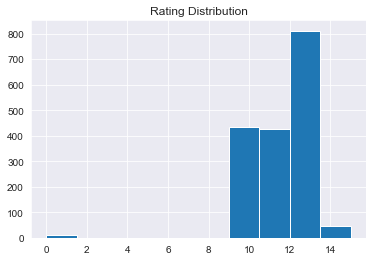

In [75]:
plt.hist(df.rating_numerator)
plt.title('Rating Distribution');

In [76]:
#proportion of rating_numerator greater or equal to 10 of the dataframe
df.query('rating_numerator>=9').rating_numerator.count()/df.shape[0]

0.9936452917388793

The distribution of the rating_numerator is skewed to the left with ratings between 9 and 14 being the highest. Which is comfirmed by calculating the proportion of numbers of tweets with ratings greater than 9 resulting in 99% of all the tweet.

#### _Most Tweeted types of Dog stages_

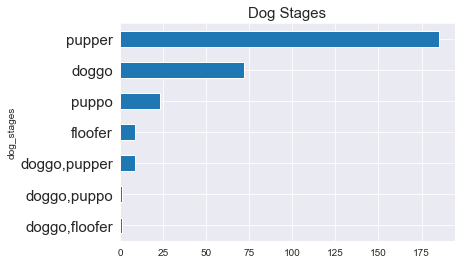

In [77]:
df.groupby('dog_stages')['tweet_id'].count().sort_values().plot(kind='barh')
plt.title('Dog Stages', fontsize=15)
plt.yticks(fontsize=15);

#### Top 10 most tweeted breed of dog

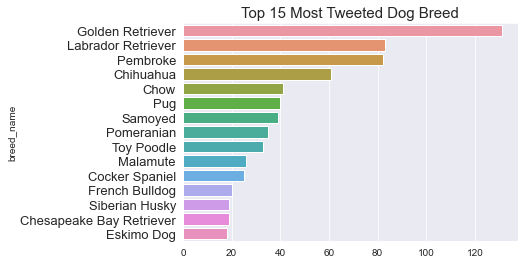

In [104]:
x = df.groupby('breed_name')['tweet_id'].count().sort_values(ascending=False)[:15].index
y = df.groupby('breed_name')['tweet_id'].count().sort_values(ascending=False)[:15].values
sns.barplot(x=y,y=x,data=df, orient='h')
plt.yticks(fontsize=13)
plt.title('Top 15 Most Tweeted Dog Breed',fontsize=15);

In [79]:
# total number of predicted breed names
len(df.breed_name.value_counts().index)

109

In [80]:
# Number of percentage of Golden Retrieval to total number of times each breed was twitted
df.breed_name.value_counts().values[0]/df.breed_name.value_counts().values.sum()

0.10564516129032259

#### _Tweets TimeSeries Charts_

In [81]:
# create a new column 'year_month' for the time series trend
df['year_month'] = df['timestamp'].apply(lambda x:'{year}-{month}'.format(year=x.year,month=x.month))

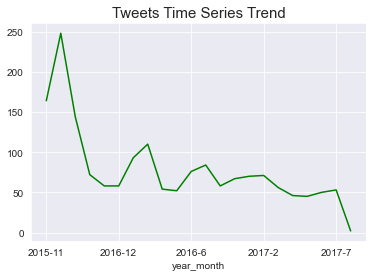

In [82]:
df.groupby('year_month')['tweet_id'].count().plot(kind='line',color='green')
plt.title('Tweets Time Series Trend',fontsize=15);

#### Relationship between Number of Retweet and Likes count

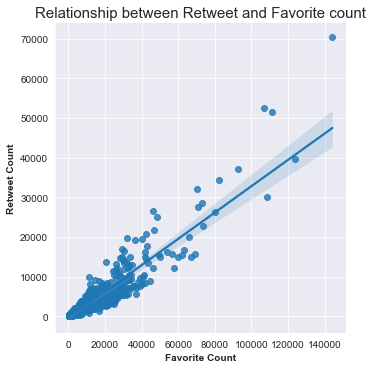

In [83]:
sns.lmplot(x='favourite_count',y='retweet_count',data=df)
plt.title('Relationship between Retweet and Favorite count',fontsize=15)
plt.xlabel('Favorite Count',weight='bold')
plt.ylabel('Retweet Count', weight='bold');

In [84]:
df[['retweet_count','favourite_count']].corr()

,retweet_count,favourite_count
retweet_count,1.000000,0.924413
favourite_count,0.924413,1.000000


The correlation coefficient (0.92) and the linear graph shows there is strong and positive relationship between the two variables meaning that both variables move in the same direction, which simply mean the higher the likes count, the higher the retweet

#### Most Twitted User Source

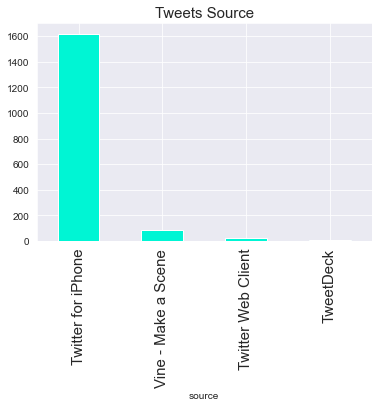

In [85]:
df.groupby('source')['tweet_id'].count().sort_values(ascending=False).plot(kind='bar', color='#00f5d4')
plt.title('Tweets Source',fontsize=15)
plt.xticks(fontsize=15);

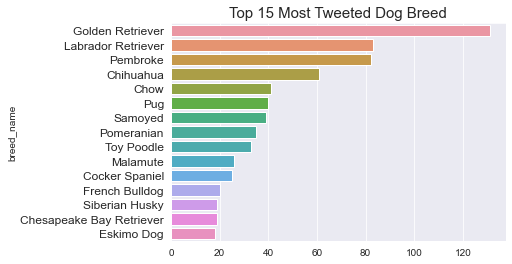